In [1]:
import scanpy as sc

In [2]:
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '/lustre/project/Stat/s1155202250/fastfolder/code/st/MultiGATE/MultiGATEgithub0607/tutorial_notebooks')
import MultiGATE 

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
adata1=sc.read_h5ad('./STSMresults/adata1.h5ad')
adata1

AnnData object with n_obs × n_vars = 2820 × 1538
    obs: 'orig.ident', 'nCount_Spatial', 'nFeature_Spatial', 'lesion', 'region', 'RegionLoupe', 'annotations', 'SPM_pixels', 'nCount_SPM', 'nFeature_SPM', 'SPM_orig.ident', 'SPM_nCount_Spatial', 'SPM_nFeature_Spatial', 'SPM_x_coord', 'SPM_y_coord', 'nCount_SPT', 'nFeature_SPT', 'ST_clusters', 'seurat_clusters', 'SM_clusters', 'Dopamine', 'SPT.weight', 'SPM.weight', 'integrated_clusters', 'mclust', 'MultiGATE'
    var: 'mz'
    uns: 'avg', 'mclust_colors', 'umap'
    obsm: 'MultiGATE_clip_all', 'X_umap', 'spatial'
    obsp: 'avg_connectivities', 'avg_distances'

In [4]:
n_clusters=11
adata1_results = MultiGATE.mclust_R(adata1, used_obsm='MultiGATE_clip_all', num_cluster=n_clusters)

R[write to console]:                    __           __ 
   ____ ___  _____/ /_  _______/ /_
  / __ `__ \/ ___/ / / / / ___/ __/
 / / / / / / /__/ / /_/ (__  ) /_  
/_/ /_/ /_/\___/_/\__,_/____/\__/   version 5.4.10
Type 'citation("mclust")' for citing this R package in publications.



fitting ...
  |======================================================================| 100%


/users/s1155202250/basic/conda/condainstall/envs/MultiGATEhome/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


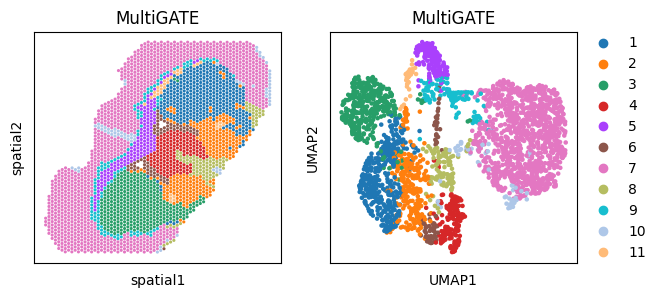

<Figure size 700x300 with 0 Axes>

In [5]:
size=20
plt.rcParams["figure.figsize"] = (7, 3) 
fig, axs = plt.subplots(1, 2)
sc.pl.embedding(adata1, basis='spatial', color='mclust',  title='MultiGATE', s=size, show=False,ax=axs[0],legend_loc=None)
sc.pp.neighbors(adata1, use_rep='MultiGATE_clip_all',key_added = 'avg');
sc.tl.umap(adata1,neighbors_key = 'avg');
sc.pl.umap(adata1, color="mclust",title='MultiGATE',ax=axs[1]);

plt.tight_layout()
plt.show()

In [6]:
adata1

AnnData object with n_obs × n_vars = 2820 × 1538
    obs: 'orig.ident', 'nCount_Spatial', 'nFeature_Spatial', 'lesion', 'region', 'RegionLoupe', 'annotations', 'SPM_pixels', 'nCount_SPM', 'nFeature_SPM', 'SPM_orig.ident', 'SPM_nCount_Spatial', 'SPM_nFeature_Spatial', 'SPM_x_coord', 'SPM_y_coord', 'nCount_SPT', 'nFeature_SPT', 'ST_clusters', 'seurat_clusters', 'SM_clusters', 'Dopamine', 'SPT.weight', 'SPM.weight', 'integrated_clusters', 'mclust', 'MultiGATE'
    var: 'mz'
    uns: 'avg', 'mclust_colors', 'umap'
    obsm: 'MultiGATE_clip_all', 'X_umap', 'spatial'
    obsp: 'avg_connectivities', 'avg_distances'

In [7]:
# save adata1 into h5ad
adata1.write_h5ad('./STSMresults/adata1.h5ad')